# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import json

## **Scrapping Movies Data**

In [4]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [5]:
# Write Your Code here
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)

In [6]:
# Show list of all urls
url_list

['https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/project-k',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/kill-2024',
 'https://www.justwatch.com/in/movie/stree',
 'https://www.justwatch.com/in/movie/maharaja-2024',
 'https://www.justwatch.com/in/movie/siddharth-roy',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/chandu-champion',
 'https://www.justwatch.com/in/movie/raayan',
 'https://www.justwatch.com/in/movie/laila-majnu',
 'https://www.justwatch.com/in/movie/phir-aayi-hasseen-dillruba',
 'https://www.justwatch.com/in/movie/indian-2',
 'https://www.justwatch.com/in/movie/kingdom-of-the-planet-of-the-apes',
 'https://www.justwatch.com/in/movie/golam',
 'https://www.justwatch.com/in/movie/aadujeevitham',
 'https://www.justwatch.com/in/movie/bhediya',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/365-days',
 'https://www.justwatch

## **Scrapping Movie Title**

In [7]:
# Write Your Code here

links = soup.find_all('a', href=True)

movie_titles = []
for link in links:
    href = link['href']
    if '/in/movie/' in href:
        title = href.strip("/in/movie/").replace("-", " ").title()
        movie_titles.append(title)

print(movie_titles)

['Stree 2', 'Project K', 'Unjha', 'Kill 2024', 'Str', 'Aharaja 2024', 'Siddharth Roy', 'Deadpool 3', 'Chandu Champ', 'Raaya', 'Laila Majnu', 'Phir Aayi Hasseen Dillruba', 'Dian 2', 'Kingdom Of The Planet Of The Apes', 'Gola', 'Aadujeevitha', 'Bhediya', 'Dune Part Tw', '365 Days', 'The Fall Guy', 'Salaar', 'Aavesham 2024', 'Twisters', 'Je Jatt Vigad Gya', 'Side Out 2', 'T Ends With Us', 'Furiosa', 'Godzilla X Kong The New Empir', 'Deadpool', 'Despicable Me 4 2024', 'Aharsh', 'Untitled Vicky Kaushal Prime Video Project', 'Agent', 'Aatta', 'Tumbbad', 'Double Ismart', 'The U', 'A Quiet Place Day ', 'The Gangster The Cop The Devil', 'Bad Boys 4', 'Longlegs', 'Ullozhukku', 'The Hunger Games The Ballad Of Songbirds And Snakes', 'Daa', 'Trisha On The Rocks', 'The Ministry Of Ungentlemanly Warfar', 'Ppenheimer', 'Aharaj', 'Harom Hara', 'Laapataa Ladies', 'Anjummel Boys', 'Little Hearts', 'Land Of Bad', 'Perfect Days', 'Sam Bahadur', 'Dangal', 'Dune 2021', 'Turbo 2024', 'Alien Covenant', 'Hanu M

## **Scrapping release Year**

In [8]:
# Write Your Code here
release_year = []

# Iterate over the movies url
for url in url_list:
     try:
        headers =  {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }
        data = requests.get(url,headers = headers)
        soup = BeautifulSoup(data.text,'html.parser')
        year = eval(soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('span')[0].text.strip())
     except:
        year = "NA"
     release_year.append(year)

print(release_year)

[2024, 2024, 2024, 2024, 2018, 2024, 2024, 2024, 2024, 2024, 2018, 2024, 2024, 2024, 2024, 2024, 2022, 2024, 2020, 2024, 2023, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2016, 2024, 2019, 2024, 2023, 2024, 2018, 2024, 2024, 2024, 2019, 2024, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 2023, 'NA', 'NA', 'NA', 'NA', 'NA', 2024, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 2021, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 2023, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 2024, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 2015, 'NA', 'NA', 'NA', 'NA', 'NA', 2024, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 2020, 'NA', 'NA', 2024, 'NA', 2024, 'NA', 'NA', 2024, 'NA', 'NA', 'NA']


## **Scrapping Genres**

In [9]:
# Write Your Code here
list_of_genres = []

for url in url_list:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Genres':
        genres = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    genres = "NA"
  list_of_genres.append(genres)

print(list_of_genres)

['Comedy, Horror', 'Action & Adventure, Fantasy, Science-Fiction, Drama, Mystery & Thriller', 'Comedy, Horror', 'Comedy, Horror', 'Comedy, Horror, Drama', 'Comedy, Horror, Drama', 'Romance, Drama', 'Comedy, Action & Adventure, Science-Fiction', 'Comedy, Action & Adventure, Science-Fiction', 'Action & Adventure, Drama, Mystery & Thriller', 'Action & Adventure, Drama, Mystery & Thriller', 'Mystery & Thriller, Romance, Crime, Drama', 'Mystery & Thriller, Romance, Crime, Drama', 'Mystery & Thriller, Romance, Crime, Drama', 'Mystery & Thriller, Romance, Crime, Drama', 'Mystery & Thriller, Romance, Crime, Drama', 'Mystery & Thriller, Comedy, Horror', 'Mystery & Thriller, Comedy, Horror', 'Mystery & Thriller, Comedy, Horror', 'Mystery & Thriller, Comedy, Horror', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Action & Adventure, Comedy', 'Action & Adventure, Mystery & Thriller', 'Drama', 'Drama', 'Drama', 'Action & Adventure, Science-Fiction, Mystery & Thriller', 'Action & Adventure

## **Scrapping IMBD Rating**

In [14]:
# Write Your Code here

# Initialize a varible to store all IMDB ratings
imdb_rating = []

# Iterate over the url_list data
for url in url_list:
  # lets handle the error
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Rating':
        rating = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text.strip()
  except:
    rating = 'NA'
  imdb_rating.append(rating)

print(imdb_rating)

['7.7  (17k)38%', '7.2  (51k)79%', '6.6  (19k)56%', '6.6  (19k)56%', '7.5  (41k)79%', '8.6  (43k)83%', '7.4  (2k)', '7.4  (2k)', '8.0  (30k)87%', '6.5  (6k)', '7.7  (6k)60%', '5.8  (5k)40%', '4.0  (14k)15%', '6.9  (116k)80%', '7.3  (2k)', '7.1  (40k)86%', '6.7  (25k)62%', '8.5  (508k)92%', '3.3  (100k)', '3.3  (100k)', '6.5  (68k)73%', '7.9  (19k)', '7.9  (19k)', '7.9  (19k)', '7.9  (19k)', '7.9  (19k)', '7.9  (19k)', '6.1  (100k)54%', '8.0  (1m)85%', '8.0  (1m)85%', '7.2  (10k)', '7.2  (10k)', '7.2  (10k)', '8.2  (3k)100%', '8.2  (3k)100%', '3.7', '5.4  (30k)38%', '5.4  (30k)38%', '6.9  (25k)97%', '6.9  (25k)97%', '6.9  (25k)97%', '7.6  (1k)100%', '6.7  (140k)64%', '6.7  (140k)64%', '5.4  (2k)', '6.8  (94k)69%', '8.3  (791k)', '6.5  (12k)23%', '8.0  (2k)', '8.4  (40k)100%', '8.3  (21k)', '6.7  (1k)', '6.6  (38k)68%', '7.9  (56k)96%', '7.7  (17k)38%', '7.7  (17k)38%', '8.0  (900k)', '8.0  (900k)', '6.4  (315k)65%', '7.8  (26k)88%', '6.9  (31k)58%', '7.0  (2k)', '5.0  (6k)', '5.1  (1k)4

## **Scrapping Runtime/Duration**

In [15]:
# Write Your Code here
runtime_list = []

for url in url_list:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    }
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Runtime':
        runtime = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    runtime = "NA"
  runtime_list.append(runtime)

print(runtime_list)

['2h 27min', '2h 56min', '2h 3min', '1h 45min', '2h 7min', '2h 21min', '2h 28min', '2h 8min', '2h 22min', '2h 25min', '2h 19min', '2h 13min', '3h 0min', '2h 25min', '2h 0min', '2h 0min', '2h 36min', '2h 47min', '1h 54min', '2h 6min', '2h 55min', '2h 38min', '2h 3min', '2h 12min', '1h 37min', '2h 10min', '2h 28min', '1h 55min', '1h 48min', '1h 34min', '2h 56min', '2h 20min', '2h 34min', '2h 19min', '1h 53min', '2h 36min', '1h 49min', '1h 39min', '1h 50min', '1h 50min', '1h 41min', '2h 3min', '2h 37min', '2h 30min', '2h 52min', '2h 2min', '3h 0min', '2h 12min', '2h 34min', '2h 2min', '2h 15min', '2h 15min', '1h 53min', '2h 5min', '2h 30min', '2h 41min', '2h 41min', '2h 30min', '2h 30min', '2h 30min', '2h 15min', '1h 56min', '2h 30min', '2h 30min', '2h 29min', '2h 2min', '2h 2min', '2h 2min', '2h 26min', '3h 24min', '1h 42min', '1h 59min', '1h 59min', '2h 36min', '2h 36min', '2h 12min', '2h 12min', '2h 36min', '2h 9min', '1h 34min', '1h 34min', '1h 34min', '2h 0min', '2h 0min', '2h 32min'

## **Scrapping Age Rating**

In [16]:
# Write Your Code here
age_ratings = []

for url in url_list:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    }
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Age rating':
        age_rating = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    age_rating = "NA"
  age_ratings.append(age_rating)

print(age_ratings)

['UA', 'UA', 'UA', 'A', 'UA', 'UA', 'A', 'A', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'U', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'U', 'U', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'A', 'A', 'UA', 'U', 'U', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'U', 'U', 'U', 'UA', 'UA', 'A', 'U', 'U', 'UA', 'A', 'A', 'U', 'U', 'U', 'U', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA']


## **Fetching Production Countries Details**

In [17]:
# Write Your Code here
production_countries = []

for url in url_list:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')

    for x in soup.find_all('div',attrs = {'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text ==' Production country ':
         country = x.find_all('div',attrs = {'class':'detail-infos__value'})[0].text

  except:
    country = "NA"
  production_countries.append(country)

print(production_countries)

['India', 'India', 'India', 'India', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'India', 'India', 'United States', 'India', 'United States, India', 'India', 'United States', 'Poland', 'Australia, Canada, United States', 'India', 'India', 'United States', 'India', 'United States', 'United States', 'Australia, United States', 'United States', 'United States', 'United States', 'India', 'India', 'India', 'India', 'India, Sweden', 'India', 'United States', 'United States, United Kingdom, Canada', 'South Korea', 'United States', 'Canada, United States', 'India', 'Canada, United States', 'India', 'India', 'Turkey, United States, United Kingdom', 'United Kingdom, United States', 'India', 'India', 'India', 'India', 'India', 'Czech Republic, United States, Australia', 'Germany, Japan', 'India', 'India, United States', 'United States', 'India', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'India', 'C

## **Fetching Streaming Service Details**

In [18]:
# Write Your Code here
movie_streaming_services =[]

for url in url_list:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,"html.parser")

    service = soup.find_all("img",attrs={'class':'offer__icon'})
    alt_values = [img['alt'] for img in service]
    alt_values = (",".join(alt_values))

  except :
    alt_values = 'NA'
  movie_streaming_services.append(alt_values)

print(movie_streaming_services)

['Bookmyshow', 'Amazon Prime Video,Amazon Prime Video,Netflix,Amazon Video,Bookmyshow', 'Hotstar', 'Hotstar,Bookmyshow', 'Apple TV,Hotstar,Apple TV,Apple TV', 'Netflix,Bookmyshow', 'aha', 'Bookmyshow', 'Amazon Prime Video,Amazon Prime Video', 'Amazon Prime Video,Amazon Prime Video,Sun Nxt,Amazon Video,Bookmyshow', 'Zee5', 'Netflix', 'Netflix', 'Apple TV,Hotstar,Apple TV,Amazon Video,Apple TV', 'Amazon Prime Video,Amazon Prime Video', 'Netflix', 'Jio Cinema,Jio Cinema', 'Apple TV,Jio Cinema,Amazon Video,Apple TV,Apple TV', 'Netflix', 'Apple TV,Zee5,Amazon Video,Apple TV,Apple TV', 'Hotstar,Netflix,Bookmyshow', 'Amazon Prime Video,Amazon Prime Video,Hotstar,Amazon Video', 'Apple TV,Apple TV,Amazon Video,Apple TV', '', 'Apple TV,Apple TV,Bookmyshow', 'Bookmyshow', 'Apple TV,Amazon Video,Apple TV,Apple TV', 'Apple TV,Jio Cinema,Amazon Video,Apple TV,Apple TV', 'Apple TV,Hotstar,Amazon Video,Apple TV,Apple TV', 'Apple TV,Zee5,Amazon Video,Apple TV,Apple TV,Bookmyshow', 'Amazon Prime Video,A

## **Now Creating Movies DataFrame**

In [19]:
# Write Your Code here
df_movie = {
    'movies_title': movie_titles,
    'movies_year' : release_year,
    'movies_genre' : list_of_genres,
    'movies_imdb_rating':imdb_rating,
    'movies_runtime' : runtime_list,
    'production_country' : production_countries,
    'streaming_service' : movie_streaming_services,
    'movie_link': url_list
}

df_movie = pd.DataFrame(df_movie)
df_movie.head(5)

,movies_title,movies_year,movies_genre,movies_imdb_rating,movies_runtime,production_country,streaming_service,movie_link
0,Stree 2,2024,"Comedy, Horror",7.7 (17k)38%,2h 27min,India,Bookmyshow,https://www.justwatch.com/in/movie/stree-2
1,Project K,2024,"Action & Adventure, Fantasy, Science-Fiction, ...",7.2 (51k)79%,2h 56min,India,"Amazon Prime Video,Amazon Prime Video,Netflix,...",https://www.justwatch.com/in/movie/project-k
2,Unjha,2024,"Comedy, Horror",6.6 (19k)56%,2h 3min,India,Hotstar,https://www.justwatch.com/in/movie/munjha
3,Kill 2024,2024,"Comedy, Horror",6.6 (19k)56%,1h 45min,India,"Hotstar,Bookmyshow",https://www.justwatch.com/in/movie/kill-2024
4,Str,2018,"Comedy, Horror, Drama",7.5 (41k)79%,2h 7min,India,"Apple TV,Hotstar,Apple TV,Apple TV",https://www.justwatch.com/in/movie/stree


## **Scraping TV  Show Data**

In [20]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
 403
</title>
403 Forbidden



In [21]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
request = requests.get(url,headers = headers)
soup = BeautifulSoup(request.text,'html.parser')

## **Fetching Tv shows Url details**

In [22]:
tv_show_url = []
for x in soup.find_all('a',attrs={'class':'title-list-grid__item--link'}):
  tv_show_url.append('https://www.justwatch.com'+x['href'])

In [23]:
print(tv_show_url)

['https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/adams-sweet-agony', 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/shekhar-home', 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/the-boys', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/ic-814', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/the-umbrella-academy', 'https://www.justwatch.com/in/tv-show/terminator-zero', 'https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/shahmaran', 'https://www.justwatch.com/in/tv-show/the-frog-2024', 'https

## **Fetching Tv Show Title details**

In [24]:
# Write Your Code here
tv_show_title = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    }
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    # Extract the title directly from the h1 tag
    title = soup.find('h1').text.strip()
  except:
    title = "NA"
  tv_show_title.append(title)

print(tv_show_title)

['Mirzapur (2018)', "Adam's Sweet Agony (2024)", 'Gyaarah Gyaarah (2024)', 'House of the Dragon (2022)', 'Shekhar Home (2024)', 'XXX: Uncensored (2018)', 'Game of Thrones (2011)', 'The Boys (2019)', 'Panchayat (2020)', 'IC 814: The Kandahar Hijack (2024)', 'Attack on Titan (2013)', 'Apharan (2018)', 'The Umbrella Academy (2019)', 'Terminator Zero (2024)', 'The Lord of the Rings: The Rings of Power (2022)', 'Shōgun (2024)', 'Shahmaran (2023)', 'The Frog (2024)', 'Sweet Home (2020)', 'NA', 'NA', 'NA', 'NA', 'NA', 'Terror Tuesday: Extreme (2024)', 'NA', 'NA', 'NA', 'NA', 'NA', 'Kaos (2024)', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Evil (2019)', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Pachinko (2022)', 'NA', 'NA', 'NA', 'NA', 'NA', 'Dark (2017)', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Romance in the House (2024)', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', "A Good Girl's Guide to Murder (2024)", 'NA', 'NA', 'NA', 'NA', 'NA', 'The Influencer (2024)', 'NA', 'NA', 'NA', '

## **Fetching Release Year**

In [25]:
# Write Your Code here
tv_shows_release_year = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url,headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    year = eval(soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('span')[0].text.strip())
  except:
    year = None
  tv_shows_release_year.append(year)

print(tv_shows_release_year)

[2018, 2024, 2024, 2022, 2024, 2018, 2011, 2019, 2020, 2024, 2013, 2018, None, None, 2022, None, None, None, 2020, 2022, None, None, None, None, None, 2008, None, None, None, None, None, 2020, None, None, None, None, None, None, None, None, 2019, None, None, None, None, None, None, 2010, None, None, None, None, None, None, 2017, None, None, None, None, None, None, None, 2019, None, None, None, None, None, None, 2020, None, None, None, None, None, None, None, None, None, 2020, None, None, 2010, None, None, None, 2018, None, None, None, None, None, None, None, None, 2004, None, 2013, None, None]


## **Fetching TV Show Genre Details**

In [26]:
# Write Your Code here
tv_shows_genres = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url,headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Genres':
        genres = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    genres = "NA"
  tv_shows_genres.append(genres)

print(tv_shows_genres)

['Action & Adventure, Drama, Crime, Mystery & Thriller', 'Animation', 'Drama, Fantasy, Science-Fiction', 'Drama, Action & Adventure, Science-Fiction, Fantasy, Romance', 'Drama, Crime', 'Comedy, Drama, Romance', 'Action & Adventure, Science-Fiction, Drama, Fantasy', 'Science-Fiction, Action & Adventure, Comedy, Crime, Drama', 'Drama, Comedy', 'Drama, History, Mystery & Thriller, War & Military', 'Action & Adventure, Drama, Fantasy, Horror, Animation, Science-Fiction', 'Action & Adventure, Crime, Mystery & Thriller, Drama', 'Science-Fiction, Action & Adventure, Comedy, Drama, Fantasy', 'Animation, Science-Fiction, Action & Adventure', 'Action & Adventure, Science-Fiction, Drama, Fantasy', 'War & Military, Drama, History', 'Action & Adventure, Drama, Science-Fiction, Mystery & Thriller, Romance, Fantasy', 'Crime, Drama, Mystery & Thriller', 'Science-Fiction, Horror, Mystery & Thriller, Drama, Fantasy', 'Mystery & Thriller, Drama, Horror, Science-Fiction', 'Comedy, Crime, Drama, Mystery & 

## **Fetching IMDB Rating Details**

In [27]:
# Write Your Code here
tv_shows_imdb_ratings = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Rating':
        rating = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text.strip()
  except:
    rating = None
  tv_shows_imdb_ratings.append(rating)
print(tv_shows_imdb_ratings)

['8.4  (87k)', '8.4  (87k)', '8.3  (3k)', '8.4  (441k)86%', '8.2  (9k)', '4.8', '9.2  (2m)89%', '8.7  (717k)93%', '9.0  (96k)', '5.3  (8k)', '9.1  (535k)96%', '8.2  (20k)', '7.8  (290k)78%', '7.1  (4k)88%', '6.9  (371k)83%', '8.6  (167k)99%', '5.3  (13k)', '6.9  (2k)43%', '7.3  (34k)83%', '7.3  (34k)83%', '7.0  (2k)', '7.0  (2k)', '8.6  (163k)100%', '8.6  (163k)100%', '5.9', '9.5  (2m)96%', '8.5  (66k)', '8.4  (47k)', '8.4  (47k)', '8.1  (162k)97%', '7.5  (7k)73%', '6.9  (122k)62%', '8.6  (242k)96%', '9.1  (1m)78%', '9.1  (1m)78%', '3.4  (3k)', '8.7  (100k)100%', '7.7  (48k)78%', '8.7  (264k)94%', '7.8  (41k)96%', '9.1  (24k)', '8.8  (670k)93%', '8.2  (544k)94%', '8.2  (544k)94%', '', '8.4', '7.2  (93k)71%', '8.1  (1m)79%', '8.1  (1m)79%', '8.1  (1m)79%', '6.5', '6.5', '6.5', '9.2  (159k)', '8.7  (458k)95%', '8.7  (458k)95%', '8.7  (458k)95%', '8.7  (458k)95%', '8.7  (458k)95%', '8.7  (458k)95%', '8.7  (458k)95%', '8.7  (458k)95%', '8.7  (458k)95%', '7.2', '7.2', '7.2', '7.2', '7.2', '

## **Fetching Age Rating Details**

In [28]:
# Write Your Code here
tv_shows_age_ratings = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url,headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Age rating':
        age_rating = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    age_rating = "NA"
  tv_shows_age_ratings.append(age_rating)

print(tv_shows_age_ratings)

['A', 'A', 'A', 'A', 'A', 'A', 'U', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'A', 'A', 'A', 'U', 'U', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'A', 'A', 'U', 'U', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U']


## **Fetching Production Country details**

In [29]:
# Write Your Code here
tv_shows_production_country = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')

    for x in soup.find_all('div',attrs = {'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text ==' Production country ':
         country = x.find_all('div',attrs = {'class':'detail-infos__value'})[0].text

  except:
    country = None
  tv_shows_production_country.append(country)

print(tv_shows_production_country)

['India', 'Japan', 'India', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'India', 'Japan', 'India', 'United States', 'United States, Japan', 'United States', 'United States', 'Turkey', 'South Korea', 'South Korea', 'United States', 'India', 'India', 'Japan', 'India', 'Thailand', 'United States', 'India', 'India', 'India', 'United States', 'United Kingdom', 'United States', 'United States', 'United Kingdom', 'United States', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United Kingdom', 'United Kingdom', 'India', 'China', 'South Korea', 'Spain', 'United States', 'South Korea, Canada, United States', 'South Korea, Canada, United States', 'India', 'United States', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'Japan', 'Japan', 'Japan', 'Japan', 'United States, India', 'United States, India', 'India', 'India', 'India', 'United States, United Kingdom', 'United Kingdom, Germany', 'Unit

## **Fetching Streaming Service details**

In [30]:
# Write Your Code here
tv_show_streaming_services =[]

for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,"html.parser")

    service = soup.find_all("img",attrs={'class':'offer__icon'})
    alt_values = [img['alt'] for img in service]
    alt_values = (",".join(alt_values))

  except :
    alt_values = 'NA'
  tv_show_streaming_services.append(alt_values)

print(tv_show_streaming_services)

['Amazon Prime Video,Amazon Prime Video', 'Amazon Prime Video,Amazon Prime Video,Anime Times Amazon Channel', 'Zee5', 'Jio Cinema', 'Jio Cinema', 'Alt Balaji', 'Jio Cinema', 'Amazon Prime Video,Amazon Prime Video', 'Amazon Prime Video,Amazon Prime Video', 'Netflix', 'Amazon Prime Video,Amazon Prime Video,Anime Times Amazon Channel', 'Alt Balaji', 'Netflix', 'Netflix', 'Amazon Prime Video,Amazon Prime Video', 'Hotstar', 'Netflix', 'Netflix', '', '', 'Netflix', 'Hotstar', '', '', 'Netflix', 'Netflix', 'Jio Cinema', 'Amazon Prime Video,Amazon Prime Video', 'MX Player', 'Hotstar', 'Netflix', 'Netflix', 'Hotstar', 'Amazon Prime Video,Amazon Prime Video,BBC Player Amazon Channel', '', 'Alt Balaji', 'Amazon Prime Video,Amazon Prime Video', 'Apple TV Plus,Apple TV+', 'Netflix,Lionsgate Play,Lionsgate Play Apple TV Channel,Lionsgate Play Amazon Channel', 'Jio Cinema', 'Sony Liv', '', '', 'MX Player,Amazon miniTV', 'Netflix', 'Netflix', 'Netflix', 'Amazon Prime Video,Netflix,Amazon Prime Video',

## **Fetching Duration Details**

In [31]:
# Write Your Code here
tv_shows_duration = []
for url in tv_show_url:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url,headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Runtime':
        duration = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    duration = "NA"
  tv_shows_duration.append(duration)

print(tv_shows_duration)

['50min', '3min', '43min', '1h 3min', '42min', '22min', '58min', '1h 1min', '35min', '38min', '25min', '24min', '51min', '29min', '29min', '59min', '49min', '58min', '58min', '50min', '57min', '57min', '57min', '57min', '43min', '47min', '47min', '56min', '43min', '43min', '43min', '31min', '34min', '1h 28min', '43min', '44min', '45min', '43min', '49min', '49min', '30min', '58min', '51min', '51min', '51min', '1h 16min', '50min', '46min', '54min', '54min', '34min', '1h 1min', '26min', '26min', '56min', '39min', '39min', '39min', '21min', '21min', '23min', '24min', '58min', '58min', '58min', '58min', '39min', '38min', '24min', '56min', '56min', '59min', '46min', '46min', '46min', '46min', '46min', '46min', '24min', '41min', '34min', '21min', '21min', '43min', '43min', '43min', '43min', '43min', '52min', '52min', '52min', '48min', '48min', '48min', '48min', '48min', '44min', '44min', '44min', '44min']


## **Creating TV Show DataFrame**

In [32]:
# Write Your Code here
df_tv_show = {
    'tv_show_title': tv_show_title,
    'tv_show_year': tv_shows_release_year,
    'tv_show_genre': tv_shows_genres,
    'tv_show_imdb_rating': tv_shows_imdb_ratings,
    'tv_show_duration': tv_shows_duration,
    'tv_show_age_rating': tv_shows_age_ratings,
    'tv_show_production_country': tv_shows_production_country,
    'tv_show_streaming_services': tv_show_streaming_services,
    'tv_show_link': tv_show_url
}

df_tv_show = pd.DataFrame(df_tv_show)
df_tv_show.head()

,tv_show_title,tv_show_year,tv_show_genre,tv_show_imdb_rating,tv_show_duration,tv_show_age_rating,tv_show_production_country,tv_show_streaming_services,tv_show_link
0,Mirzapur (2018),2018.0,"Action & Adventure, Drama, Crime, Mystery & Th...",8.4 (87k),50min,A,India,"Amazon Prime Video,Amazon Prime Video",https://www.justwatch.com/in/tv-show/mirzapur
1,Adam's Sweet Agony (2024),2024.0,Animation,8.4 (87k),3min,A,Japan,"Amazon Prime Video,Amazon Prime Video,Anime Ti...",https://www.justwatch.com/in/tv-show/adams-swe...
2,Gyaarah Gyaarah (2024),2024.0,"Drama, Fantasy, Science-Fiction",8.3 (3k),43min,A,India,Zee5,https://www.justwatch.com/in/tv-show/gyaarah-g...
3,House of the Dragon (2022),2022.0,"Drama, Action & Adventure, Science-Fiction, Fa...",8.4 (441k)86%,1h 3min,A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/house-of-...
4,Shekhar Home (2024),2024.0,"Drama, Crime",8.2 (9k),42min,A,India,Jio Cinema,https://www.justwatch.com/in/tv-show/shekhar-home


## **Task 2 :- Data Filtering & Analysis**

In [34]:
# Write Your Code here
# Copy movies dataframe
movie_df = df_movie.copy()
movie_df.info()

# Copy tv shows dataframe
tv_show_df = df_tv_show.copy()
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movies_title        110 non-null    object
 1   movies_year         110 non-null    object
 2   movies_genre        110 non-null    object
 3   movies_imdb_rating  110 non-null    object
 4   movies_runtime      110 non-null    object
 5   production_country  110 non-null    object
 6   streaming_service   110 non-null    object
 7   movie_link          110 non-null    object
dtypes: object(8)
memory usage: 7.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tv_show_title               100 non-null    object 
 1   tv_show_year                27 non-null     float64
 2   tv_show_genre               100 non-null

In [35]:
# Deal with the movies dataframe
# Check for missing values
print(df_movie.isnull().sum())  # Display the count of missing values in each column

# Fill or drop missing values if necessary
df_movie.dropna(inplace=True)

movies_title          0
movies_year           0
movies_genre          0
movies_imdb_rating    0
movies_runtime        0
production_country    0
streaming_service     0
movie_link            0
dtype: int64


In [36]:
# Deal with the tv shows dataframe
# Check for missing values
print(df_tv_show.isnull().sum())  # Display the count of missing values in each column

# Fill or drop missing values if necessary
df_tv_show.dropna(inplace=True)

tv_show_title                  0
tv_show_year                  73
tv_show_genre                  0
tv_show_imdb_rating            0
tv_show_duration               0
tv_show_age_rating             0
tv_show_production_country     0
tv_show_streaming_services     0
tv_show_link                   0
dtype: int64


In [37]:
# Checking duplcate data in movies dataframe
df_movie.duplicated().sum()

# Checking duplcate data in tv shows dataframe
df_tv_show.duplicated().sum()

0

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [40]:
# Write your code here
# Checking for the data types of Movies IMDB ratings
df_movie['movies_imdb_rating'].dtypes

# Converting the data type of Tv show IMDB ratings into float
df_movie['movies_imdb_rating'] = pd.to_numeric(df_movie['movies_imdb_rating'],errors = 'coerce')

In [41]:
# Checking for the data types of Tv show IMDB ratings
df_tv_show['tv_show_imdb_rating'].dtypes

# Converting the data type of Tv show IMDB ratings into float
df_tv_show['tv_show_imdb_rating'] = pd.to_numeric(df_tv_show['tv_show_imdb_rating'],errors = 'coerce')

In [42]:
df_movie.dtypes

,0
movies_title,object
movies_year,object
movies_genre,object
movies_imdb_rating,float64
movies_runtime,object
production_country,object
streaming_service,object
movie_link,object


In [43]:
df_tv_show.dtypes

,0
tv_show_title,object
tv_show_year,float64
tv_show_genre,object
tv_show_imdb_rating,float64
tv_show_duration,object
tv_show_age_rating,object
tv_show_production_country,object
tv_show_streaming_services,object
tv_show_link,object


In [44]:
# Calculate mean IMDB rating for movies
print("Mean IMDB rating for movies:", df_movie['movies_imdb_rating'].mean())

# Calculate mean IMDB rating for TV shows
print("Mean IMDB rating for TV shows:", df_tv_show['tv_show_imdb_rating'].mean())

Mean IMDB rating for movies: 3.7
Mean IMDB rating for TV shows: 6.0


## **Analyzing Top Genres**

In [45]:
# Write Your Code here
# For Movies
# Split genres and flatten the list
movie_genres_list = [genre.strip() for genres in df_movie['movies_genre'] for genre in genres.split(',')]
# Count the frequency of each genre
movie_genre_counts = pd.Series(movie_genres_list).value_counts()
print("Top Genres in Movies:\n", movie_genre_counts)

# For TV Shows
# Split genres and flatten the list
tv_show_genres_list = [genre.strip() for genres in df_tv_show['tv_show_genre'] for genre in genres.split(',')]
# Count the frequency of each genre
tv_show_genre_counts = pd.Series(tv_show_genres_list).value_counts()
print("\nTop Genres in TV Shows:\n", tv_show_genre_counts)

Top Genres in Movies:
 Drama                 69
Mystery & Thriller    62
Action & Adventure    51
Crime                 38
Comedy                34
Horror                32
Romance               27
Science-Fiction       10
Fantasy                7
Sport                  7
Kids & Family          6
War & Military         4
Made in Europe         3
Animation              2
Name: count, dtype: int64

Top Genres in TV Shows:
 Drama                 23
Science-Fiction       13
Action & Adventure    11
Mystery & Thriller     9
Fantasy                9
Comedy                 9
Crime                  7
Romance                6
Animation              5
Horror                 4
History                2
Kids & Family          2
War & Military         1
Documentary            1
Name: count, dtype: int64


* The top genre for movies dataset is Drama.
* The top genre for Tv shows dataset is also Drama.


In [46]:
#Let's Visvalize it using word cloud
!pip install wordcloud

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

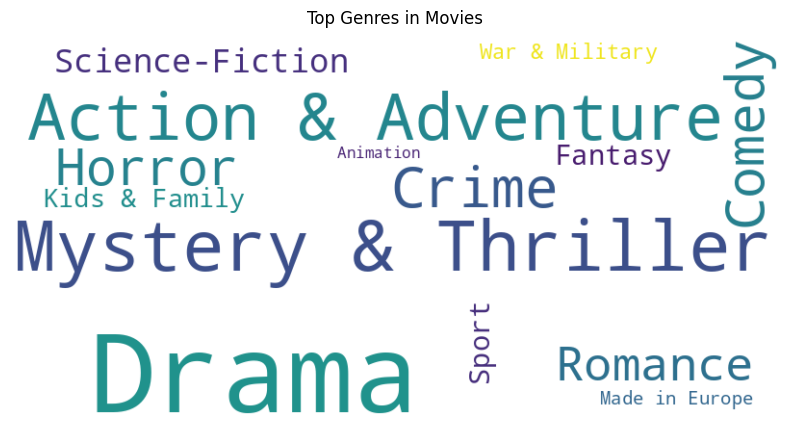

In [48]:
# For Movies
movie_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movie_genre_counts)
plt.figure(figsize=(10, 5))
plt.imshow(movie_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Genres in Movies')
plt.show()

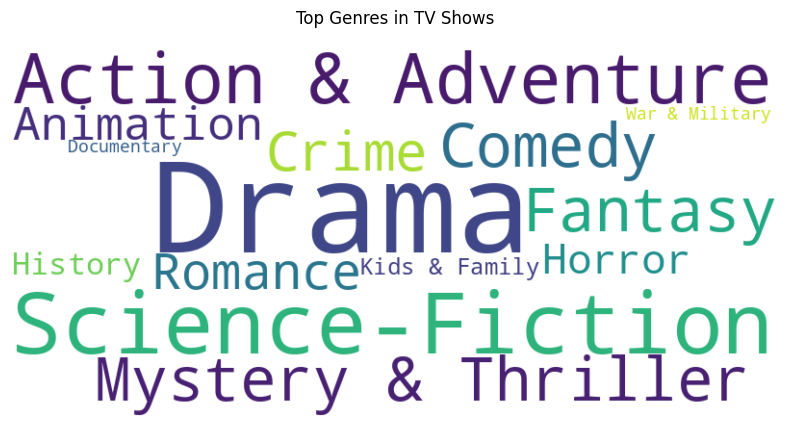

In [49]:
# For TV Shows
tv_show_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tv_show_genre_counts)
plt.figure(figsize=(10, 5))
plt.imshow(tv_show_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Genres in TV Shows')
plt.show()


## **Finding Predominant Streaming Service**

In [50]:
# Write Your Code here
# For Movies
movie_streaming_list = [service.strip() for services in df_movie['streaming_service'] for service in services.split(',')]
movie_streaming_counts = pd.Series(movie_streaming_list).value_counts()
print("Predominant Streaming Services in Movies (Descending Order):\n", movie_streaming_counts)

Predominant Streaming Services in Movies (Descending Order):
 Apple TV                            91
Amazon Prime Video                  52
Amazon Video                        36
Hotstar                             22
Bookmyshow                          19
                                    19
Jio Cinema                          19
Netflix                             19
Zee5                                11
aha                                  4
Lionsgate Play                       3
Lionsgate Play Apple TV Channel      3
Lionsgate Play Amazon Channel        3
Sun Nxt                              2
Tata Play                            2
Hungama Play                         1
MUBI                                 1
MUBI Amazon Channel                  1
Eros Now Select Apple TV Channel     1
Name: count, dtype: int64


The leading streaming platform for movie dataset is Apple TV.

In [51]:
# For TV Shows
tv_show_streaming_list = [service.strip() for services in df_tv_show['tv_show_streaming_services'] for service in services.split(',')]
tv_show_streaming_counts = pd.Series(tv_show_streaming_list).value_counts()
print("\nPredominant Streaming Services in TV Shows (Descending Order):\n", tv_show_streaming_counts)


Predominant Streaming Services in TV Shows (Descending Order):
 Amazon Prime Video                 16
Netflix                             6
                                    5
Jio Cinema                          4
Anime Times Amazon Channel          2
Alt Balaji                          2
Zee5                                1
Sony Liv                            1
Lionsgate Play                      1
Lionsgate Play Apple TV Channel     1
Lionsgate Play Amazon Channel       1
Name: count, dtype: int64


The leading streaming platform for tv shows dataset is Amazon Prime Video.

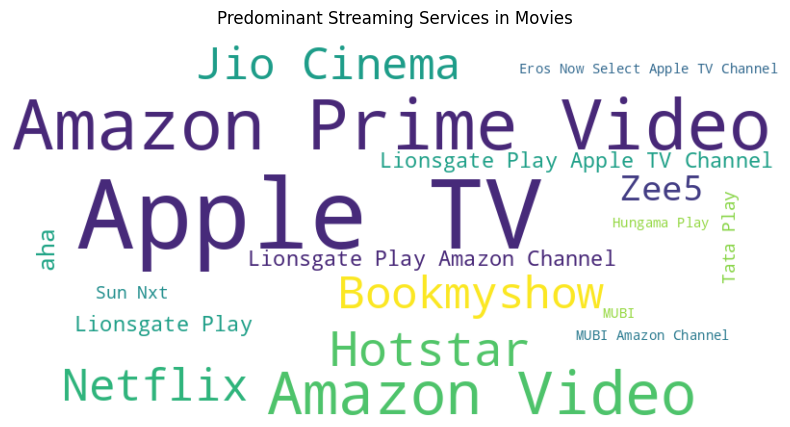

In [52]:
#Let's Visvalize it using word cloud
# For Movies
movie_streaming_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movie_streaming_counts)
plt.figure(figsize=(10, 5))
plt.imshow(movie_streaming_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Predominant Streaming Services in Movies')
plt.show()

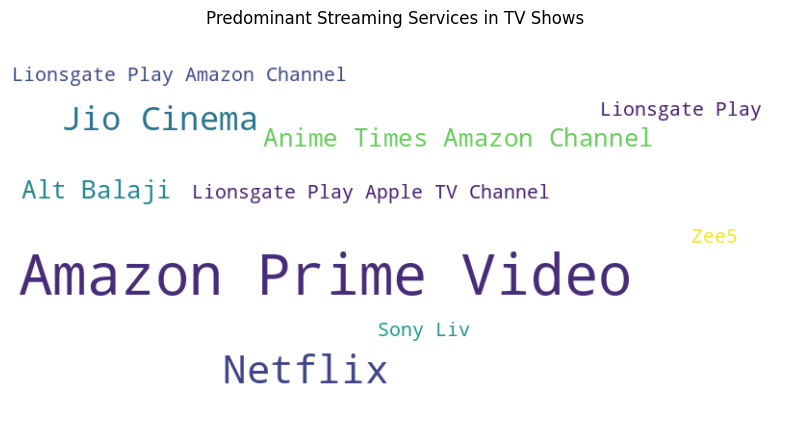

In [53]:
# For TV Shows
tv_show_streaming_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tv_show_streaming_counts)
plt.figure(figsize=(10, 5))
plt.imshow(tv_show_streaming_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Predominant Streaming Services in TV Shows')
plt.show()

## **Task 3 :- Data Export**

In [55]:
#saving final dataframe as Final Data in csv format
# Merge the DataFrames
final_data = pd.concat([movie_df, tv_show_df], axis=0)

# Save the merged DataFrame to a CSV file
final_data.to_csv('Final_Data.csv', index=False)

In [56]:
#saving filter data as Filter Data in csv format
# Merge the DataFrames
filter_data = pd.concat([df_movie, df_tv_show], axis=0)

# Save the merged DataFrame to a CSV file
filter_data.to_csv('filter_data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

In [70]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Get the file IDs for the CSV files
!ls "/content/drive/My Drive/" | grep "Final_Data.csv"
!ls "/content/drive/My Drive/" | grep "filter_data.csv"

Final_Data.csv
filter_data.csv


In [81]:
final_data = pd.read_csv('/content/drive/MyDrive/Final_Data.csv')
filter_data = pd.read_csv('/content/drive/MyDrive/filter_data.csv')

# ***Congratulations!!! You have completed your Assignment.***